# Análise das Stories

Notebook para o auxílio da análise das stories da Taís.


## Instalação

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Instalação do rasa

Intalando as configurações necessárias a partir do arquivo requirements.txt

In [2]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -r requirements.txt


Verificando versões:

In [3]:
import rasa_nlu
import rasa_core

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))


rasa_nlu: 0.13.7 rasa_core: 0.9.0


### Outras ferramentas necessárias

Para algumas visualizações é necessário graphviz.

Instalando:

In [4]:
!{python} -m pip install graphviz;

# Análise e Avaliação das Stories

### Gerando imagens de fluxo

Gerando os arquivos de imagem para a visualização e avaliação do fluxo das stories. A célula abaixo gera uma imagem para cada arquivo de stories. 
Para ver as imagens geradas acessa a pasta `img` deste notebook.

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 75/75 [00:00<00:00, 308.33it/s, # trackers=1]


processo


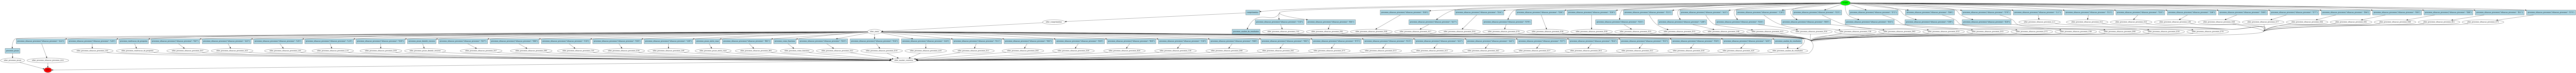

Processed Story Blocks: 100%|██████████| 17/17 [00:00<00:00, 338.61it/s, # trackers=1]


incentivo


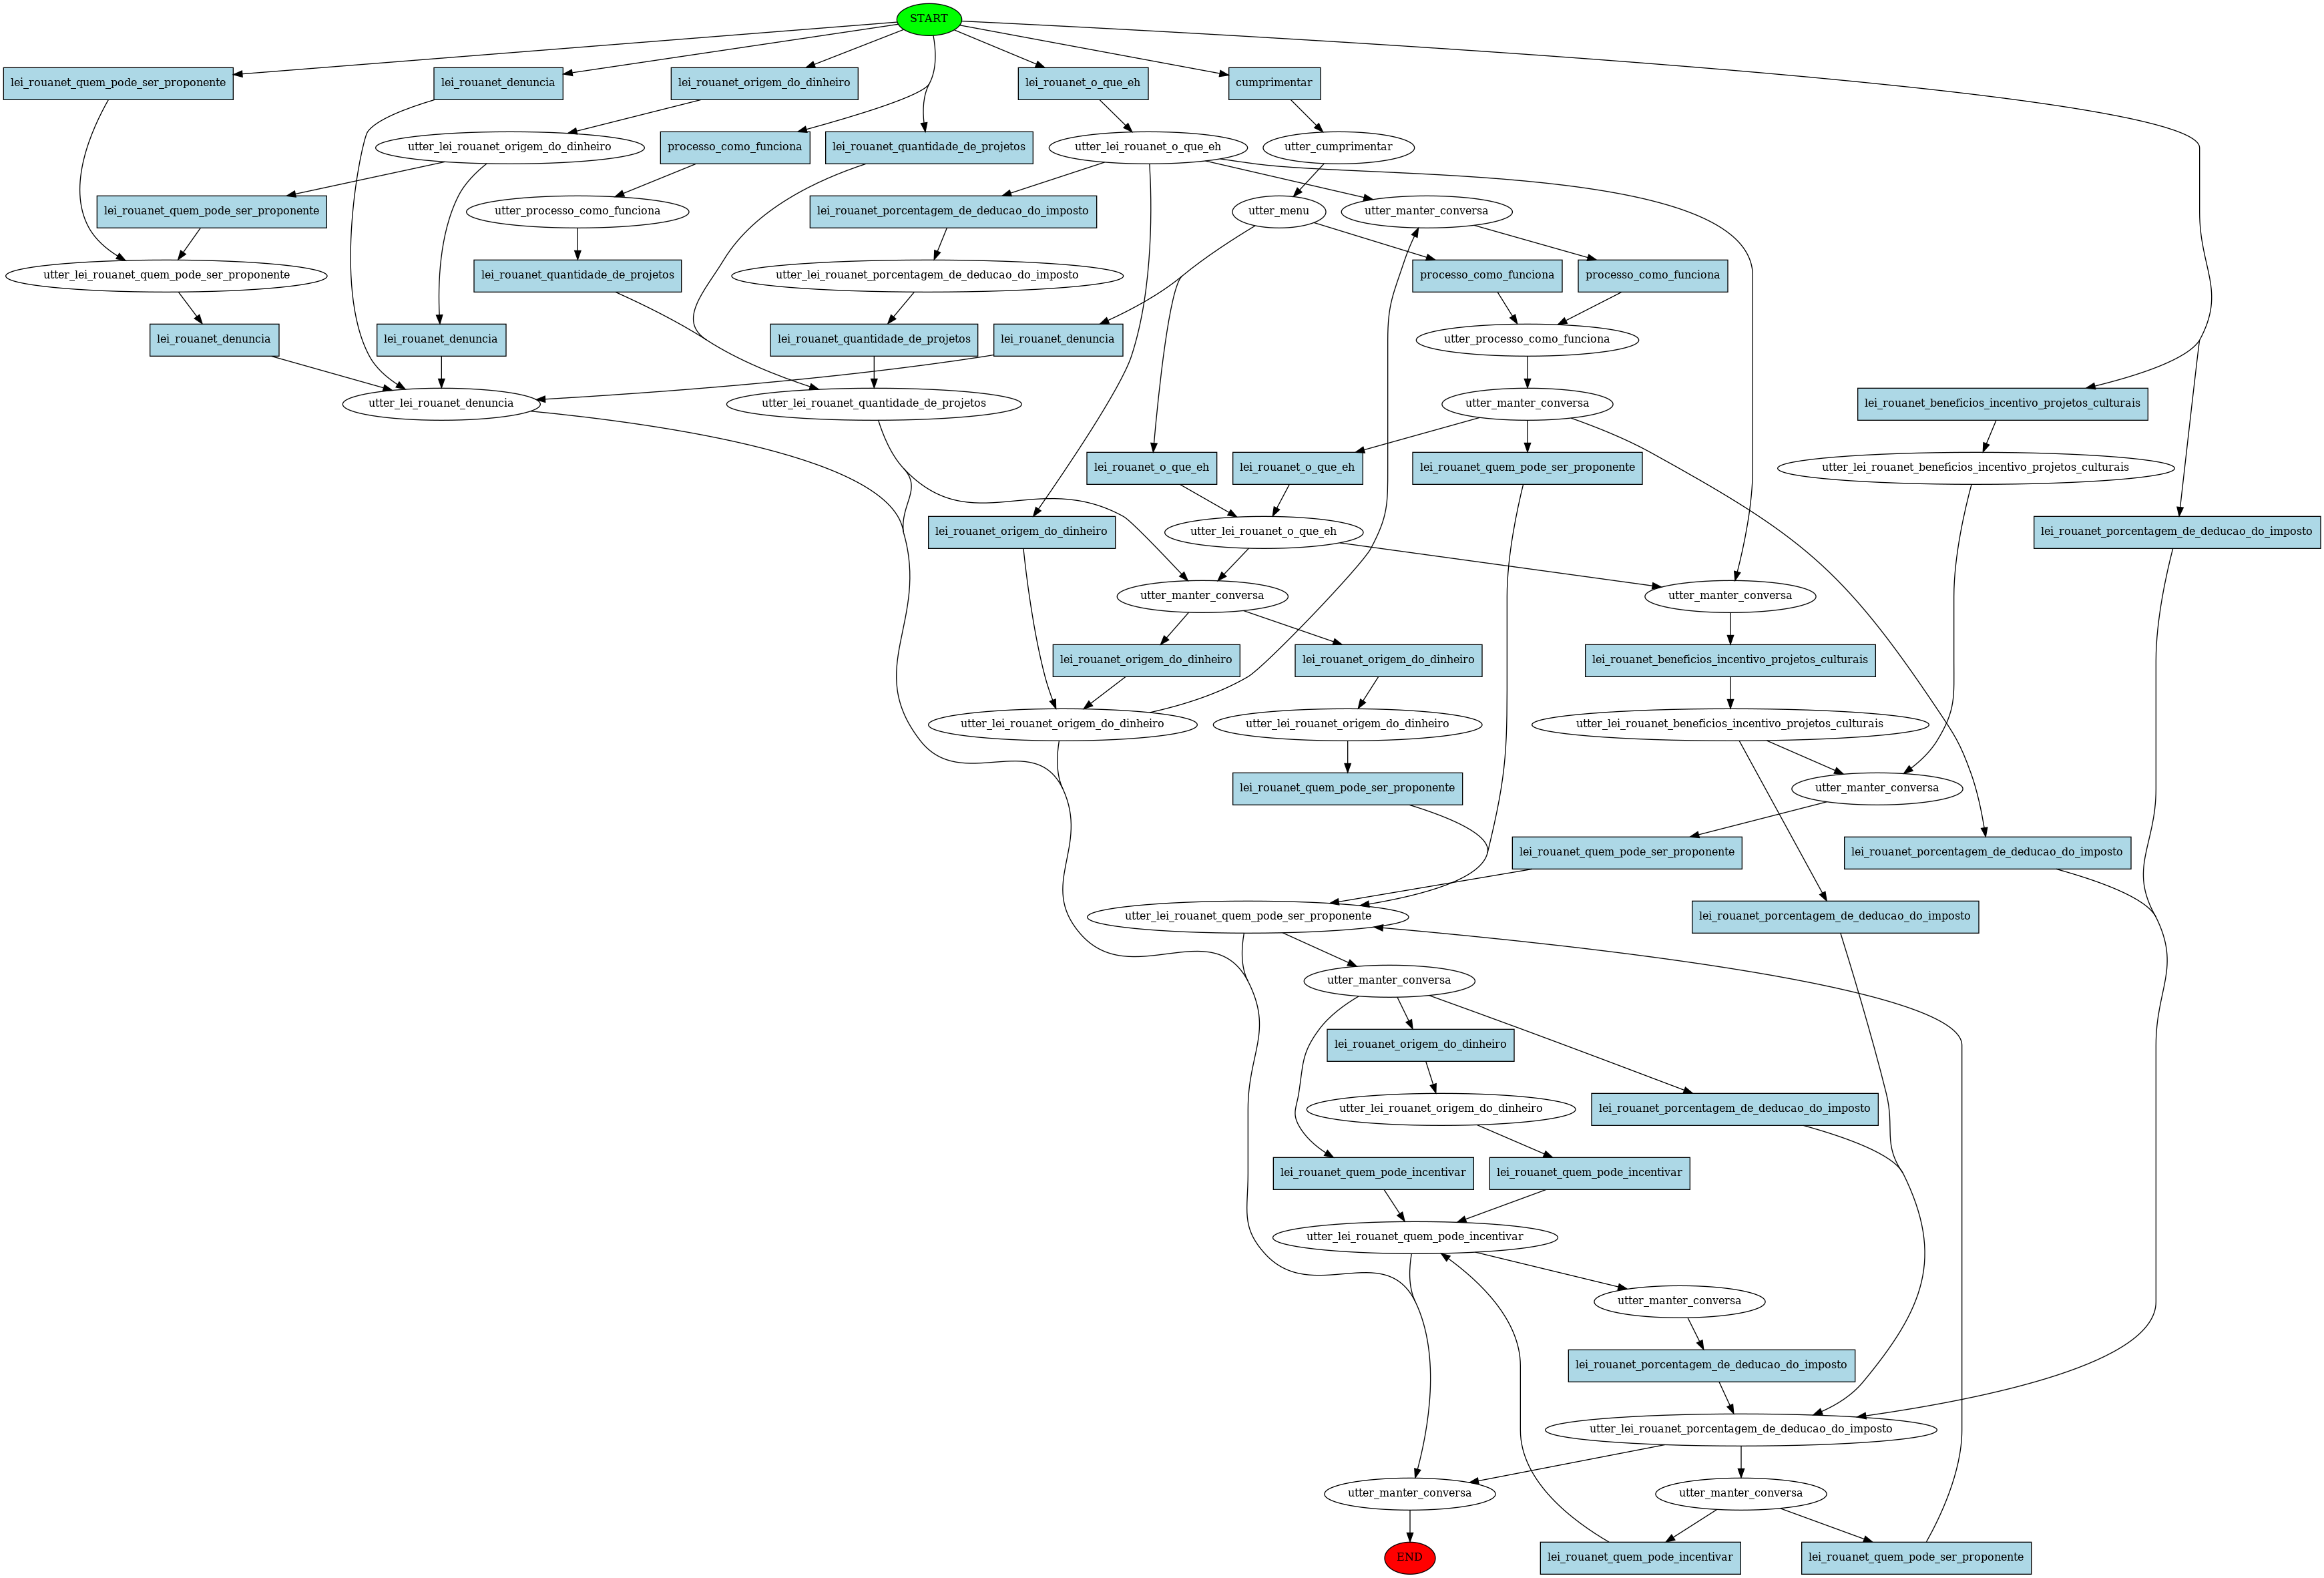

Processed Story Blocks: 100%|██████████| 8/8 [00:00<00:00, 371.16it/s, # trackers=1]

main


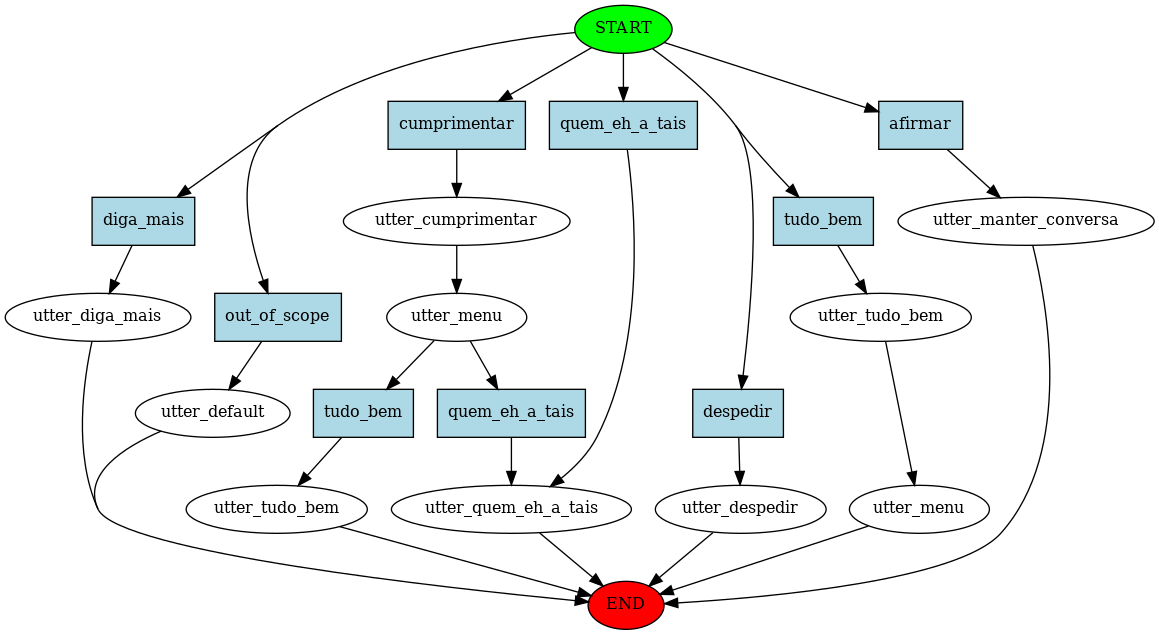

Processed Story Blocks: 100%|██████████| 4/4 [00:00<00:00, 322.02it/s, # trackers=1]


captacao


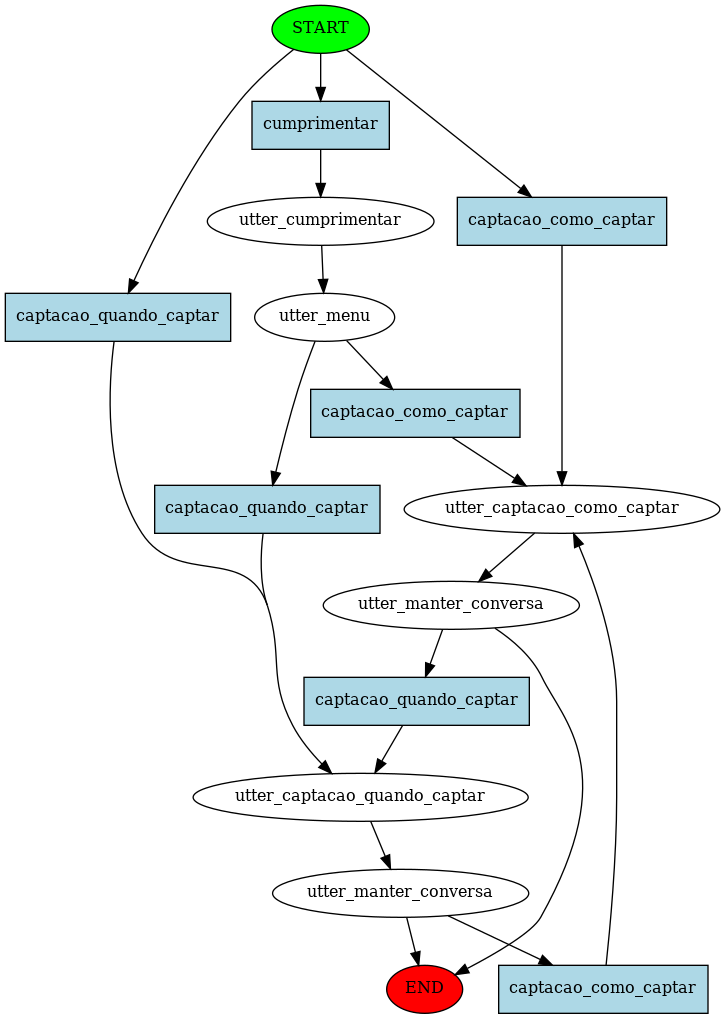

Processed Story Blocks: 100%|██████████| 18/18 [00:00<00:00, 342.02it/s, # trackers=1]


leirouanet


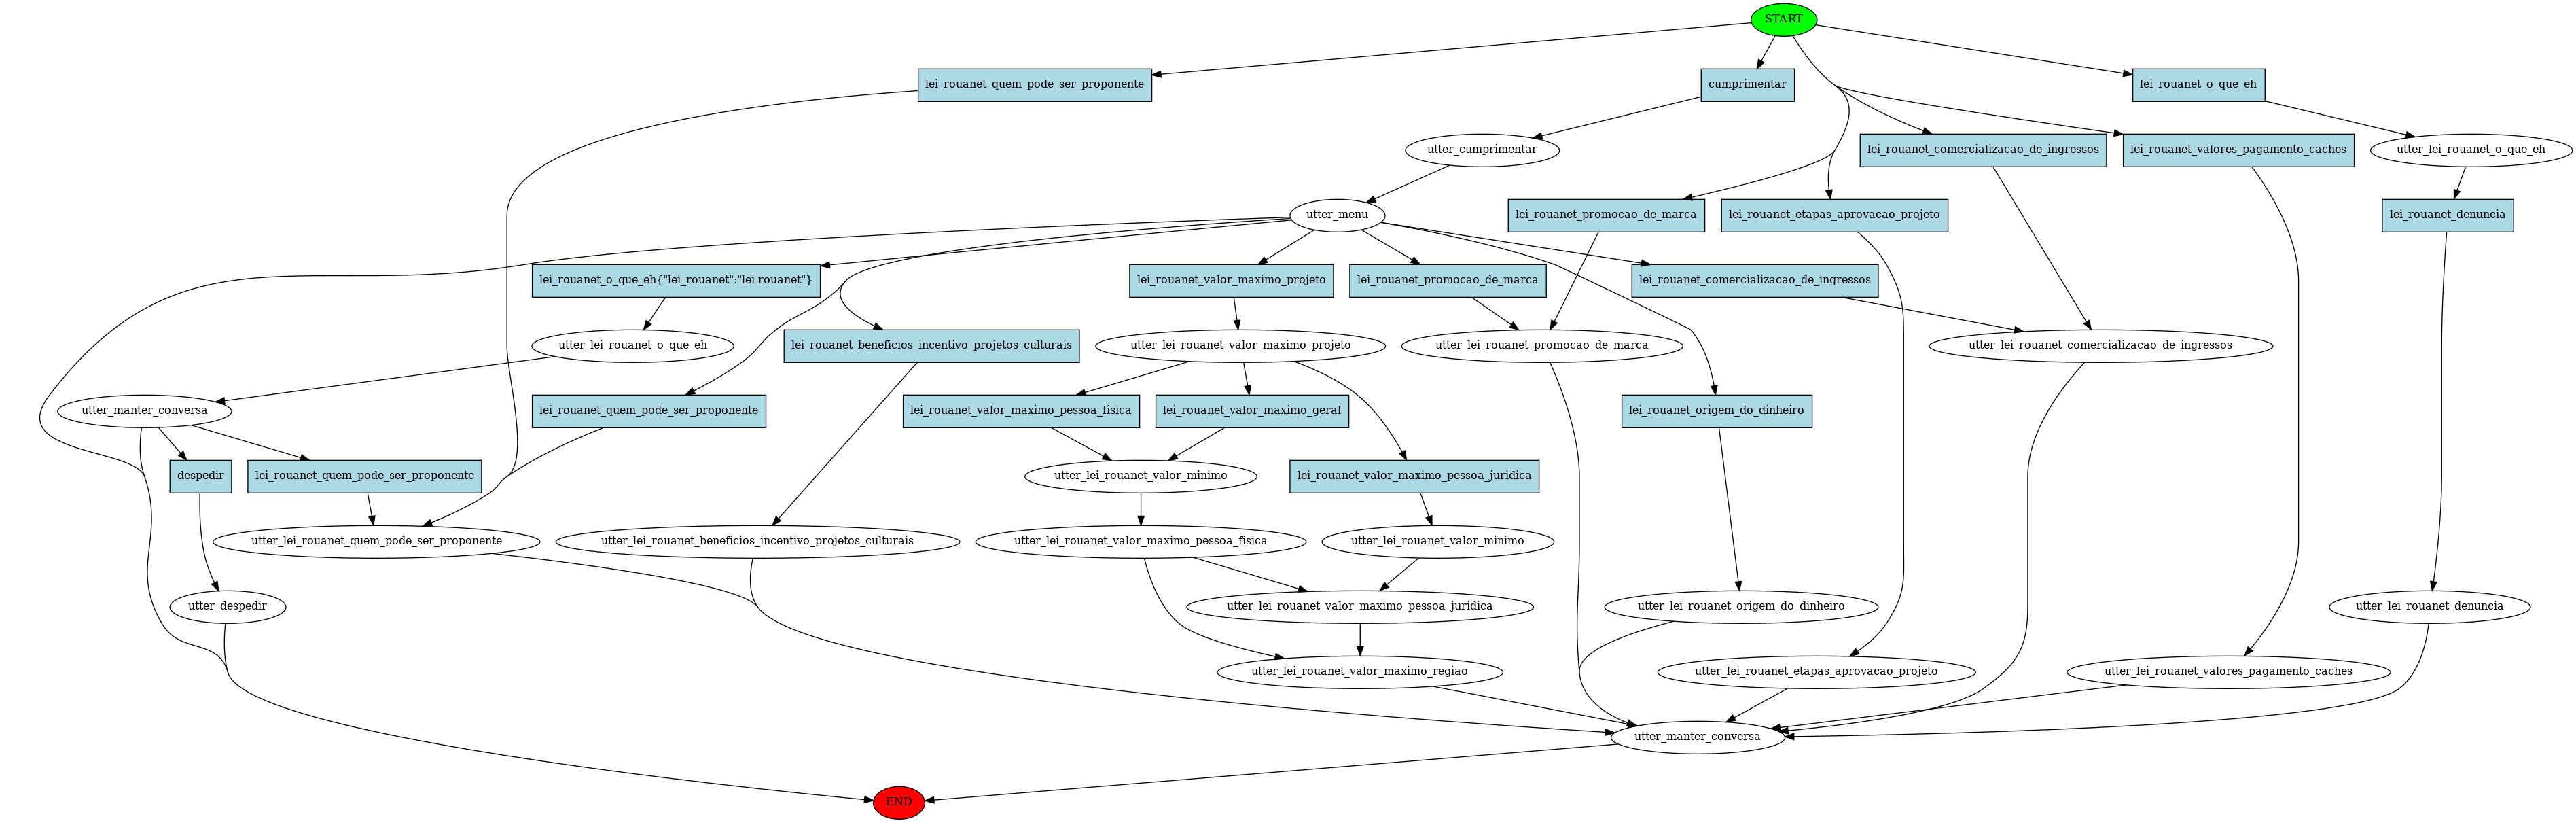

Processed Story Blocks: 100%|██████████| 18/18 [00:00<00:00, 395.92it/s, # trackers=1]


salic


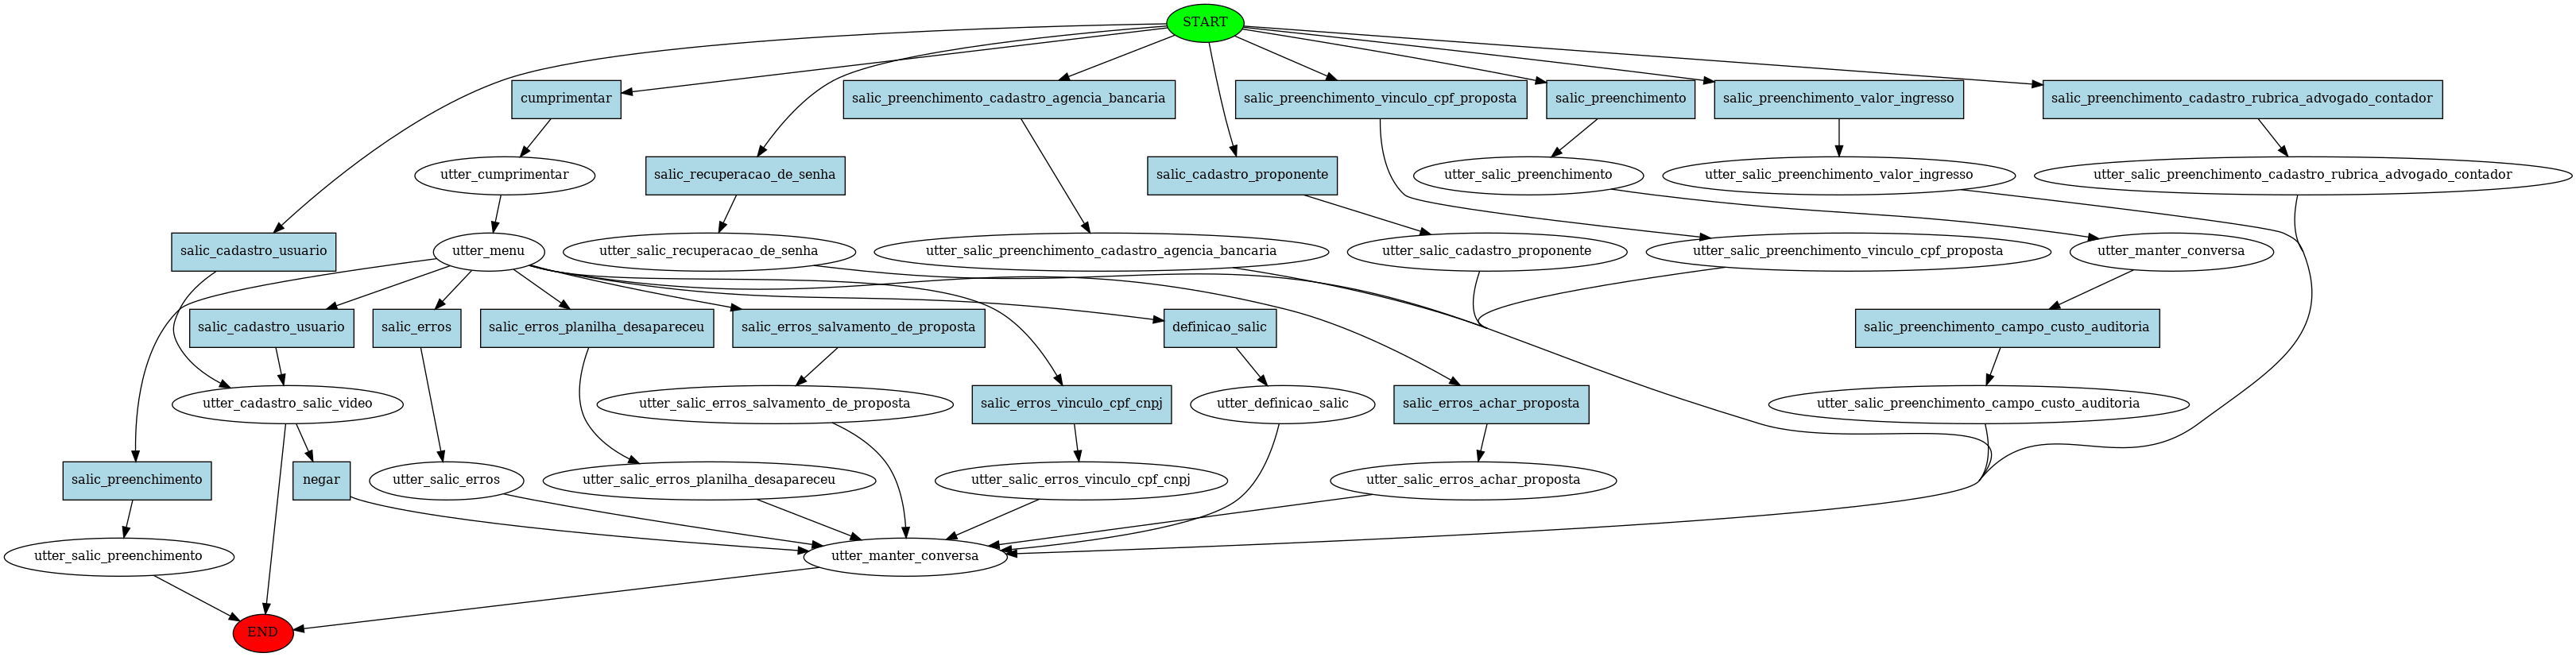

Processed Story Blocks: 100%|██████████| 15/15 [00:00<00:00, 319.43it/s, # trackers=1]


definicoes


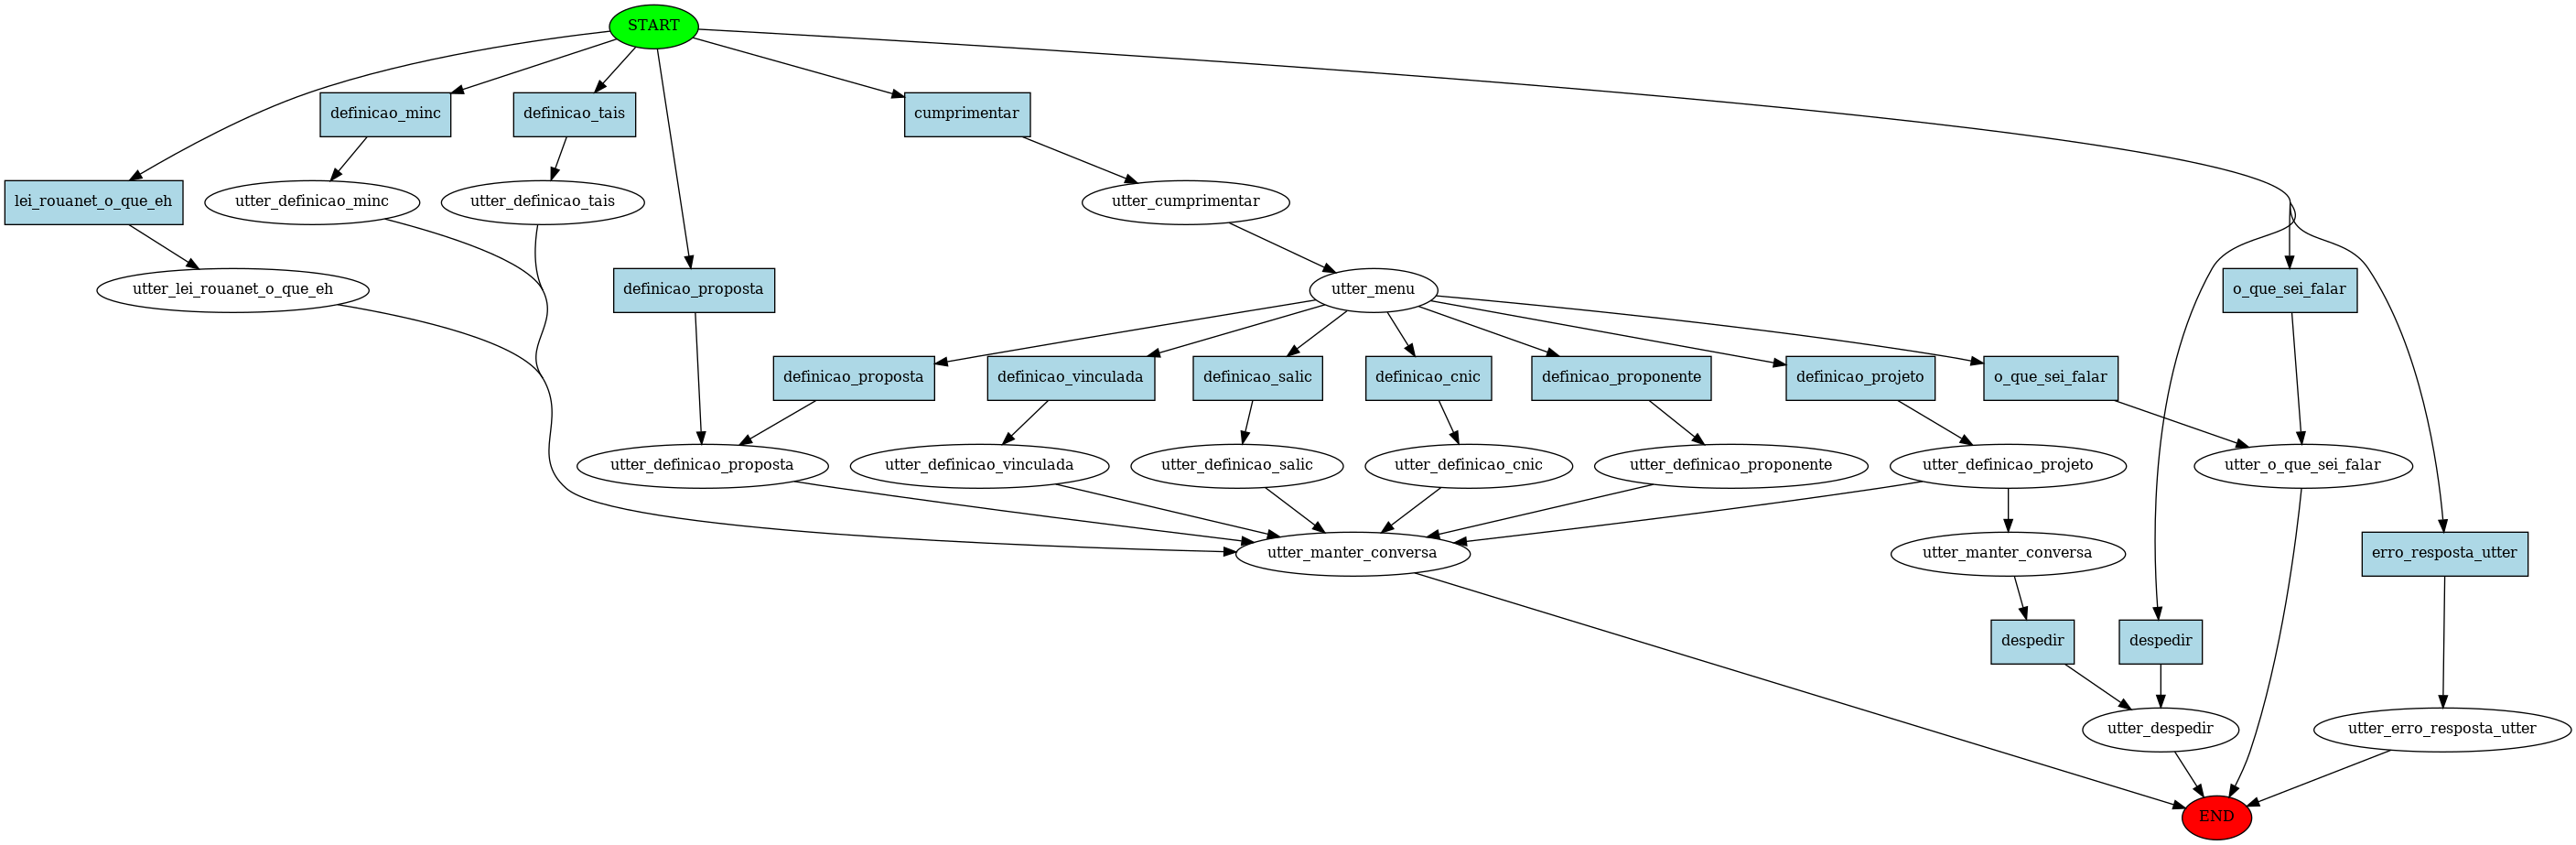

Imagens salvas


In [5]:
from IPython.display import Image
from rasa_core.agent import Agent

from os import listdir
from os.path import isfile, join


agent = Agent('../../bot/domain.yml')

# Adds all stories files in a list
stories_files = [f for f in listdir("../../bot/data/stories") if isfile(join("../../bot/data/stories", f))]

# Generate the image for each file
for file in stories_files:
    
    new_img_file = './img/story_graph_' + file[:-3] + '.png'
    
    agent.visualize('../../bot/data/stories/' + file,
                    new_img_file,
                    max_history = 2)
    
    print(file[:-3])
    display(Image('./img/story_graph_' + file[:-3] + '.png'))

print("Imagens salvas")

### Treinando as stories e gerando o gráfico

Na celula abaixo é feito o treinamento das stories e é gerado o gráfico da matriz de confusão para a avaliação das stories. Para melhor visualização, após rodar o código, abra o arquivo `story_eval.pdf` que será gerado e salvado na pasta `img` deste notebook.

Using TensorFlow backend.
Processed Story Blocks: 100%|██████████| 155/155 [00:03<00:00, 47.61it/s, # trackers=20]
Processed actions: 13847it [00:30, 460.45it/s, # examples=13663]
INFO:rasa_core.policies.memoization:Memorized 13663 unique action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 13847 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 5, 276)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                39552     
_________________________________________________________________
dense_1 (Dense)              (None, 138)               4554      
_________________________________________________________________
activation_1 (Activation)    (None, 138)               0         
Total params: 44,106
Trainable params: 44,106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13847/13847 [==============================] - 4s 277us/step - loss: 3.1439 - acc: 0.3491
Epoch 2/10
13847/13847 [==============================] - 3s 239us/step - loss: 2.5604 - acc: 0.4877
Epoch 3/10
13847/13847 [==============================] - 3s 244us/s

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/home/gabibs/Documentos/lappis/tais/notebooks/stories/models/dialogue'
Processed Story Blocks: 100%|██████████| 155/155 [00:00<00:00, 230701.60it/s]
INFO:rasa_core.evaluate:Evaluating 150 stories
Progress:
100%|██████████| 150/150 [00:02<00:00, 74.70it/s]
INFO:rasa_nlu.evaluate:F1-Score:  0.9876699804795283
INFO:rasa_nlu.evaluate:Precision: 0.9845774613625675
INFO:rasa_nlu.evaluate:Accuracy:  0.9908616187989556
INFO:rasa_nlu.evaluate:Classification report: 
                                                              precision    recall  f1-score   support

                                                        None       0.00      0.00      0.00         6
                                               action_listen       1.00      1.00      1.00       263
                                  utter_cadastro_salic_video       1.00      1.00      1.00         4
                   

INFO:rasa_nlu.evaluate:Confusion matrix, without normalization: 
[[  0   0   0 ...   0   0   0]
 [  0 263   0 ...   0   0   0]
 [  0   0   4 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   2]]


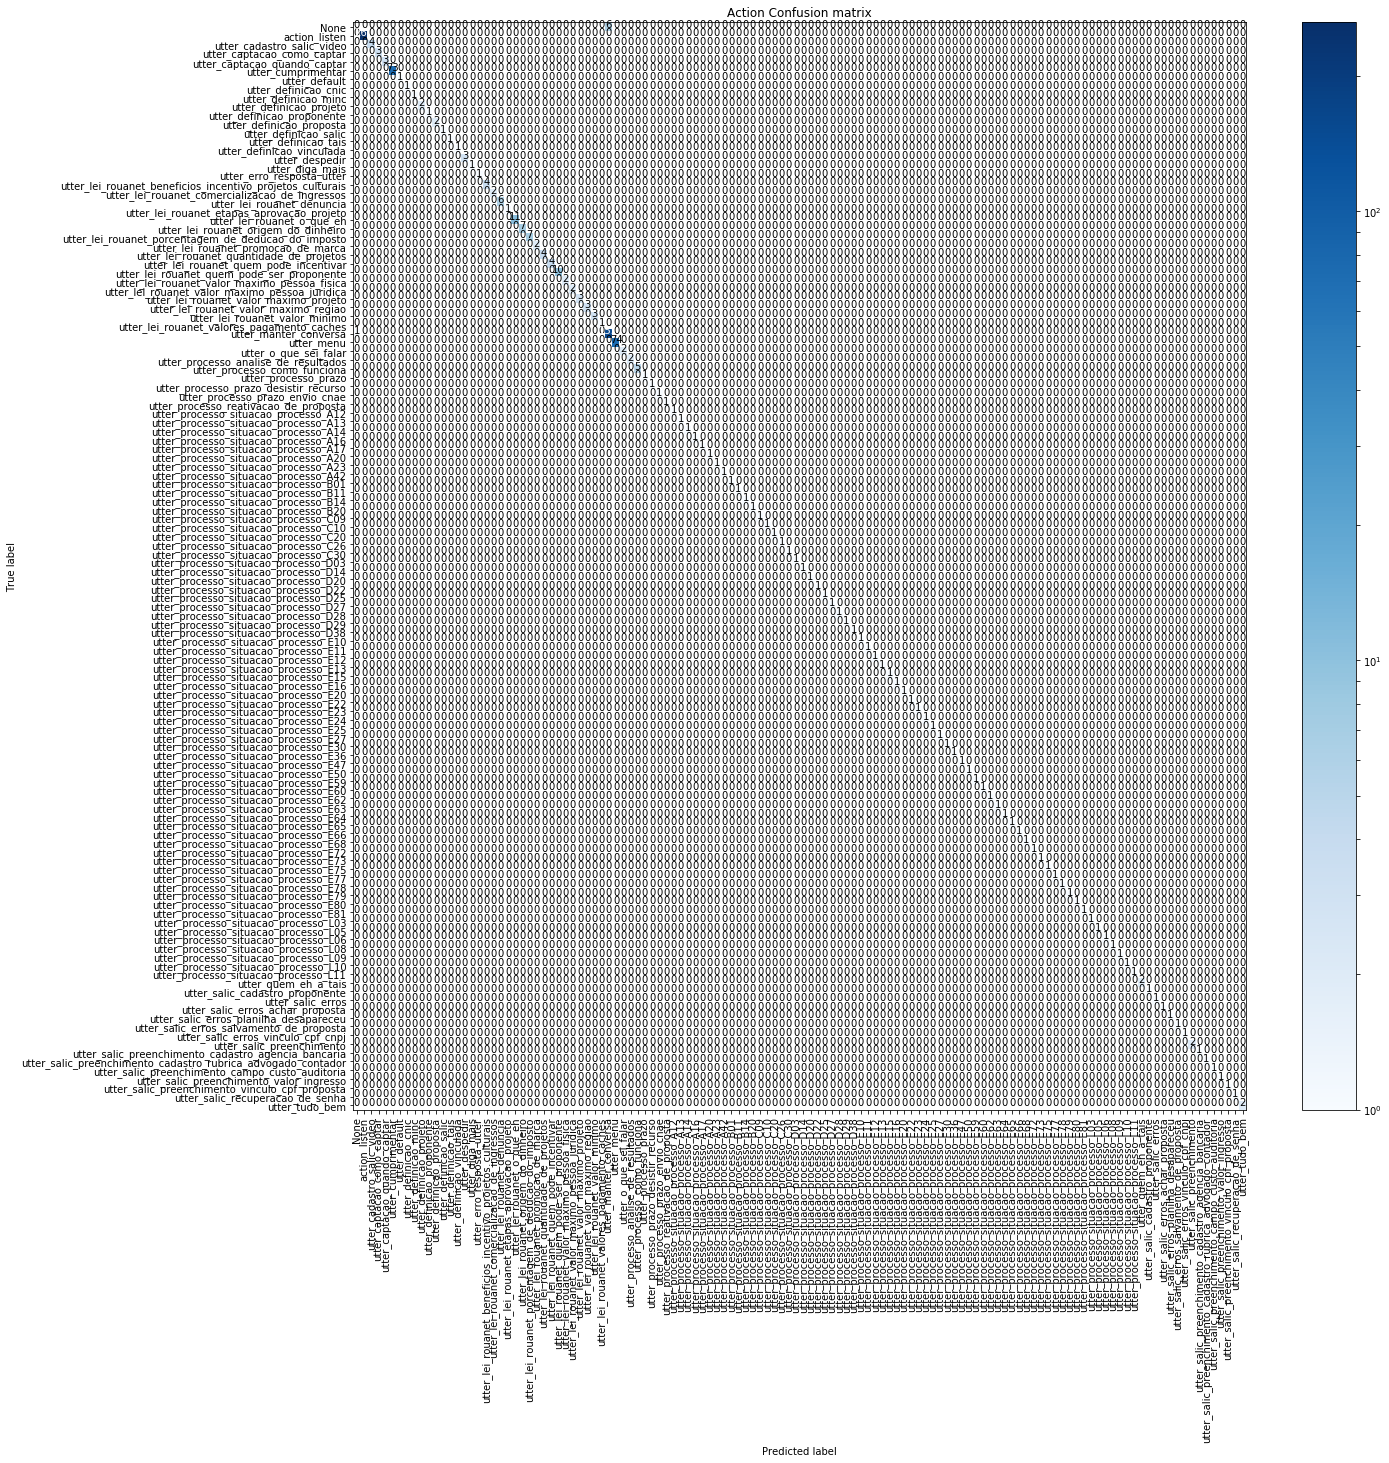

In [6]:
from rasa_core.evaluate import run_story_evaluation
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


## Treinando modelo de diálogo
agent = Agent('../../bot/domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our neatly defined training dialogues
training_data = agent.load_data('../../bot/data/stories')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=10
)

## salvando em models/dialogue
agent.persist('models/dialogue')

run_story_evaluation("../../bot/data/stories", "models/dialogue", 
                     nlu_model_path=None, 
                     max_stories=None, 
                     out_file_plot="img/story_eval.pdf")
